In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# Read csv data
data = pd.read_csv('fifa20.csv')
data.shape

(18278, 104)

### Data Cleaning

In [3]:
# choose columns for analysis
features = ['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','international_reputation',
            'weak_foot','skill_moves']       
data = pd.DataFrame(data, columns=features)
data.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves
0,32,170,72,94,94,95500000,565000,5,4,4
1,34,187,83,93,93,58500000,405000,5,4,5
2,27,175,68,92,92,105500000,290000,5,5,5
3,26,188,87,91,93,77500000,125000,3,3,1
4,28,175,74,91,91,90000000,470000,4,4,4


In [4]:
# check how much of my data is missing
round(100*(data.isnull().sum()/len(data)),2).sort_values(ascending=True).tail(60)

age                         0.0
height_cm                   0.0
weight_kg                   0.0
overall                     0.0
potential                   0.0
value_eur                   0.0
wage_eur                    0.0
international_reputation    0.0
weak_foot                   0.0
skill_moves                 0.0
dtype: float64

In [5]:
# drop NaN data

#data = data.dropna(axis=0, how='any')
#data.shape

In [6]:
# find total duplicate and drop it
print(f'Duplicate rows: {data.duplicated().sum()}')
data = data[~data.duplicated()]   # drop duplicate rows if any
data.shape

Duplicate rows: 14


(18264, 10)

### Data Exploration

In [7]:
data.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves
count,18264.000000,18264.000000,18264.000000,18264.000000,18264.000000,1.826400e+04,18264.000000,18264.000000,18264.000000,18264.000000
mean,25.284166,181.363557,75.277157,66.248467,71.549715,2.485573e+06,9462.877792,1.103263,2.944207,2.368046
std,4.656892,6.757864,7.049108,6.949590,6.140638,5.587337e+06,21358.808453,0.378995,0.664827,0.765216
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000
75%,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,3.000000
max,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,5.000000


##### Outliers Detection

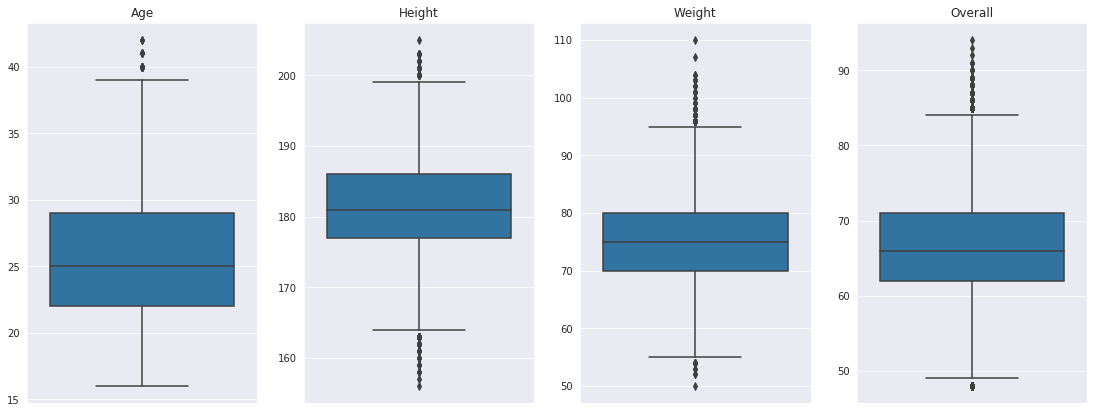

In [8]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(ncols=4, figsize=(19,7))
sns.boxplot(y='age', data=data, ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_title('Age')
sns.boxplot(y='height_cm', data=data, ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('Height')
sns.boxplot(y='weight_kg', data=data, ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_title('Weight')
sns.boxplot(y='overall', data=data, ax=ax[3])
ax[3].set_ylabel('')
ax[3].set_title('Overall')

plt.show()

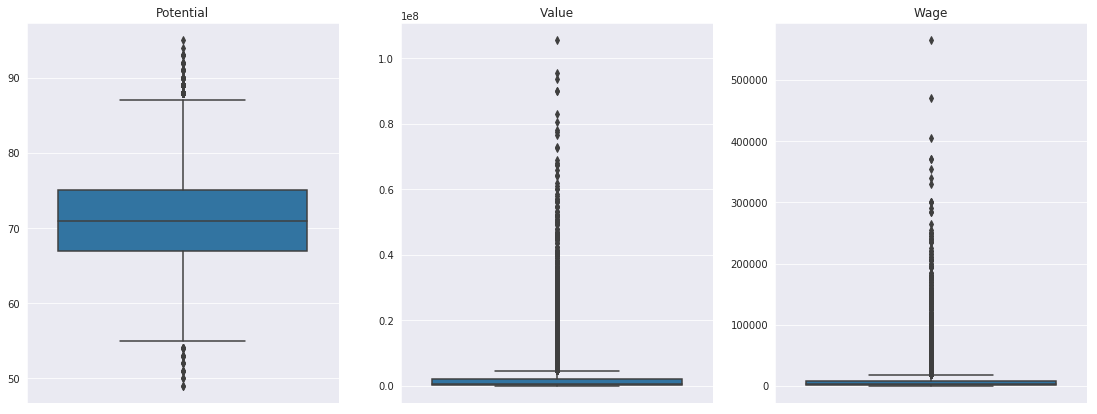

In [9]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(ncols=3, figsize=(19,7))
sns.boxplot(y='potential', data=data, ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_title('Potential')
sns.boxplot(y='value_eur', data=data, ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('Value')
sns.boxplot(y='wage_eur', data=data, ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_title('Wage')

plt.show()

In [10]:
# clean the outliers beforehand
data = data[(data['value_eur']<=1450000) & (data['height_cm']<=198) & (data['height_cm']>=164) & (data['weight_kg']<=90) & 
            (data['weight_kg']>=58) & (data['overall']<=75) & (data['overall']>=51) & (data['potential']<=81) & 
            (data['potential']>=57) & (data['wage_eur']<=6950) & (data['age']<=38)]         
data.shape

(11123, 10)

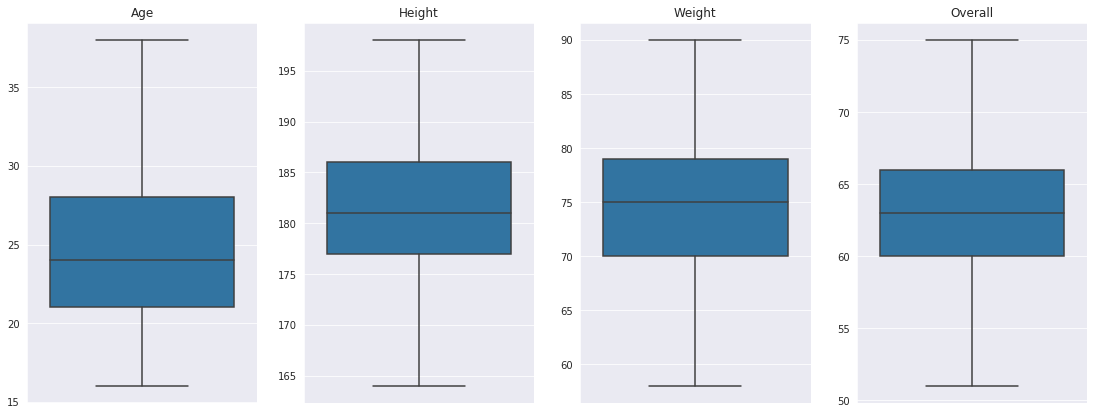

In [11]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(ncols=4, figsize=(19,7))
sns.boxplot(y='age', data=data, ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_title('Age')
sns.boxplot(y='height_cm', data=data, ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('Height')
sns.boxplot(y='weight_kg', data=data, ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_title('Weight')
sns.boxplot(y='overall', data=data, ax=ax[3])
ax[3].set_ylabel('')
ax[3].set_title('Overall')

plt.show()

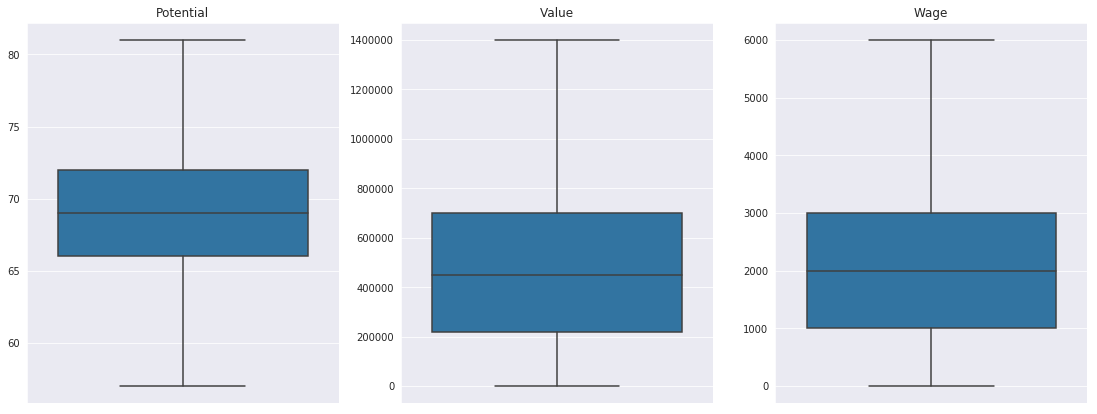

In [12]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(ncols=3, figsize=(19,7))
sns.boxplot(y='potential', data=data, ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_title('Potential')
sns.boxplot(y='value_eur', data=data, ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('Value')
sns.boxplot(y='wage_eur', data=data, ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_title('Wage')

plt.show()

##### Correlation Matrix

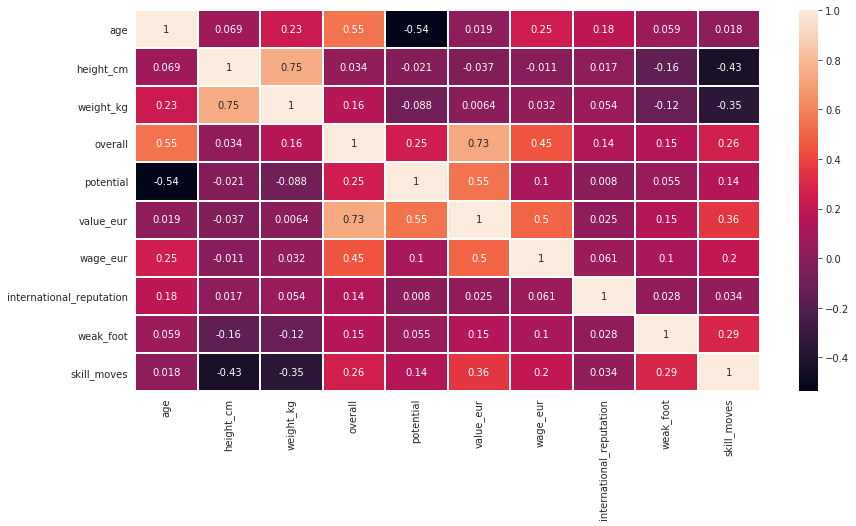

In [13]:
# Heatmap
sns.set_style('darkgrid')
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True, linewidths=1)
plt.show()

### Scaling and PCA

##### Feature Engineering

In [14]:
dc = data.drop(['wage_eur','value_eur','height_cm','weight_kg'], axis=1)
dc.head(2)

,age,overall,potential,international_reputation,weak_foot,skill_moves
1868,29,75,76,1,3,2
1941,36,75,75,2,3,3


In [15]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dc = scaler.fit_transform(dc)
dc

array([[ 0.96392992,  2.72558462,  1.47448915, -0.09289049,  0.21503751,
        -0.28199933],
       [ 2.47004141,  2.72558462,  1.26435523, 10.34368466,  0.21503751,
         1.27235078],
       [ 1.1790887 ,  2.72558462,  1.26435523, 10.34368466,  1.82031419,
         1.27235078],
       ...,
       [-0.54218156, -2.57847482, -2.0977876 , -0.09289049,  0.21503751,
        -0.28199933],
       [ 0.10329479, -2.57847482, -2.51805545, -0.09289049, -1.39023917,
        -1.83634944],
       [-0.32702278, -2.57847482, -2.51805545, -0.09289049,  0.21503751,
        -0.28199933]])

In [16]:
# Principal Component Analysis(PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(dc)
x_pca = pd.DataFrame(data=x_pca, columns=['1','2'])
x_pca.head(2)

,1,2
0,1.908363,-1.163639
1,6.158212,-0.955926


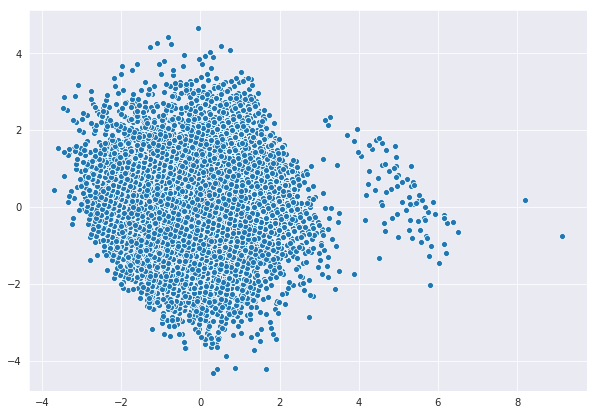

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
sns.scatterplot(x='1', y='2', data=x_pca)
plt.xlabel('')
plt.ylabel('')
plt.show()

### KMeans

##### Elbow  Curve

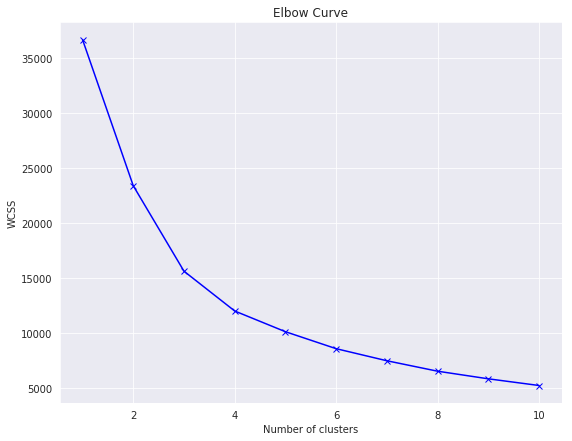

In [18]:
# To implement K-Means clustering
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):     # range from clusters
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
    

plt.figure(figsize=(9,7))
plt.plot(range(1,11),wcss, '-bx')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show() 

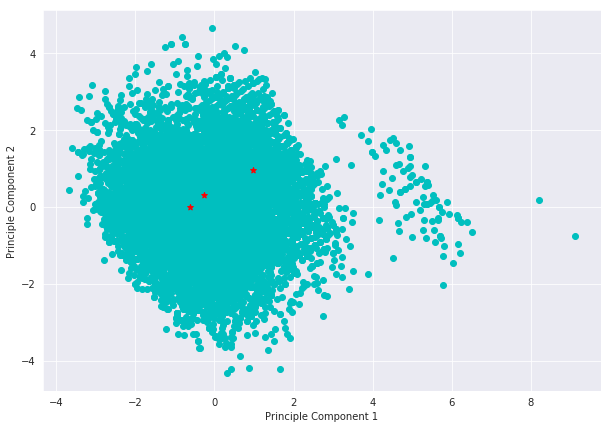

In [22]:
k=3 #from elbow method
Centroids = (x_pca.sample(n=k))

plt.figure(figsize=(10,7))
plt.scatter(x_pca['1'], x_pca['2'], color = 'c')
plt.scatter(Centroids['1'], Centroids['2'],marker='*', c='r')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')

plt.show()

##### KMeans Modeling

0.03580599828243042
-0.012573286578021946
-0.012490978428887734
-0.0031870455289027856
-0.010870740187321388
0.0006891137812952558
-0.009366106467832942
0.002402029098094789
0.006472098230432349
-0.00330486960652239
-0.010580576913405026
-0.0034766388945752374
-0.009715676462430198
0.004723499590677069
0.0037963851428775564
0.00186971639743308
0.008051572592811307
0.004286696105543553
0.0007865144787682077
0.0


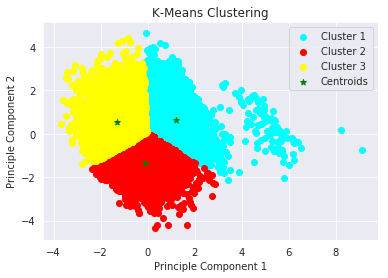

In [21]:
import numpy as np
diff = 1
j=0
# Loop sampai diff = 0
while (diff!=0) :
    i = 1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in x_pca.iterrows():
            d1 = (row_c["1"] - row_d["1"])**2
            d2 = (row_c["2"] - row_d["2"])**2
            d = np.sqrt(d1+d2)
            ED.append(d)
        x_pca[i]=ED
        i=i+1
    C=[]
    for index,row in x_pca.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    x_pca["Cluster"]=C # centroid sebelumnya akan dimasukkan kedalam cluster baru
    Centroids_new = x_pca.groupby(["Cluster"]).mean()[["2","1"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        # Centroid yang baru akan dijumlahkan dengan centroid yang lama
        diff = ((Centroids_new['2'] - Centroids['2']).sum() + (Centroids_new['1'] - Centroids['1']).sum())
        print(diff.sum())
    Centroids = x_pca.groupby(["Cluster"]).mean()[["2","1"]]
color = ['cyan','red','yellow','brown']
label = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4']

# Pemberian warna pada k dari hasil elbow method
for k in range(k):
    df = x_pca[x_pca["Cluster"] == k+1]
    plt.scatter(df["1"],df["2"], c=color[k], label=label[k])
    

plt.scatter(Centroids["1"], Centroids["2"], marker='*', c='green', label = 'Centroids')
plt.title("K-Means Clustering")
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.show()